# === Cell 1 - Metadata ===

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); border-radius: 20px; padding: 35px; margin: 25px 0; box-shadow: 0 15px 50px rgba(102, 126, 234, 0.3);">
  <h1 style="color: white; text-align: center; margin: 0 0 25px 0; font-size: 28px; text-shadow: 2px 2px 4px rgba(0,0,0,0.2);">
    🎓 Signals and Systems — Python Programming
  </h1>
  
  <div style="background: rgba(255,255,255,0.95); border-radius: 15px; padding: 25px; margin-bottom: 20px;">
    <table style="width: 100%; border-collapse: collapse;">
      <tr>
        <td style="padding: 12px; border-bottom: 2px solid #e2e8f0;">
          <strong style="color: #667eea;">👤 Student Name:</strong>
        </td>
        <td style="padding: 12px; border-bottom: 2px solid #e2e8f0;">
          <span style="color: #2d3748; font-weight: 600;">Sina Moqadasi</span>
        </td>
        <td style="padding: 12px; border-bottom: 2px solid #e2e8f0;">
          <strong style="color: #667eea;">🆔 Student ID:</strong>
        </td>
        <td style="padding: 12px; border-bottom: 2px solid #e2e8f0;">
          <span style="color: #2d3748; font-weight: 600;">401130813</span>
        </td>
      </tr>
      <tr>
        <td colspan="2" style="padding: 12px;">
          <strong style="color: #667eea;">📚 Reference Source:</strong>
        </td>
        <td colspan="2" style="padding: 12px;">
          <span style="color: #2d3748; font-weight: 600;">Signals and Systems Laboratory with MATLAB</span>
        </td>
      </tr>
    </table>
  </div>
  
  <div style="background: rgba(255,255,255,0.95); border-radius: 15px; padding: 25px; text-align: center;">
    <div style="color: #667eea; font-size: 14px; font-weight: 600; letter-spacing: 1px; margin-bottom: 10px;">
      📝 PROBLEM ASSIGNMENT
    </div>
    <div style="color: #1a202c; font-size: 48px; font-weight: 700; margin: 10px 0;">
      2.4.2
    </div>
    <div style="color: #4a5568; font-size: 15px;">
      Chapter 2 • Section 4 • Question 2
    </div>
  </div>
</div>


# === Cell 2 - Upload & display question image :===



## Problem Statement (Image)
Please paste the screenshot of the original problem statement in the space below.  
The image must clearly show the problem number, text, and any figures or diagrams included in the textbook.

<!-- Paste the screenshot of the problem here -->

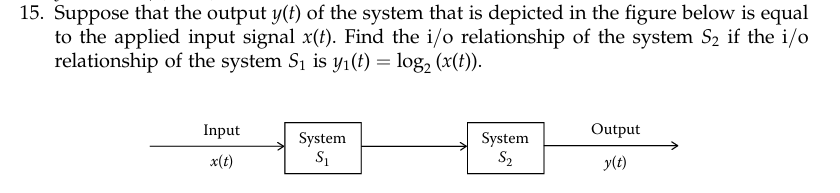

# === Cell 3 - Assumptions & method ===



<div style="background: #e3f2fd; padding: 20px; border-radius: 10px; border-left: 5px solid #2196f3; margin: 20px 0;">
  <h2 style="color: #1976d2; margin-top: 0;">🎯 Solution Strategy</h2>
  
  <h3 style="color: #1976d2;">📊 System Block Diagram:</h3>
  <div style="background: white; padding: 15px; border-radius: 8px; text-align: center; font-family: monospace; font-size: 16px; margin: 15px 0;">
    x(t) ──➤ [ S₁ ] ──➤ y₁(t) ──➤ [ S₂ ] ──➤ y(t)
  </div>
  
  <h3 style="color: #1976d2;">🔧 Mathematical Method:</h3>
  <ol style="line-height: 2; font-size: 15px;">
    <li><strong>System S₁:</strong> y₁(t) = log₂(x(t))</li>
    <li><strong>System S₂:</strong> y(t) = f(y₁(t)) where f is unknown</li>
    <li><strong>Constraint:</strong> y(t) = x(t)</li>
    <li><strong>Goal:</strong> Find f such that f(log₂(x(t))) = x(t)</li>
  </ol>
  
  <div style="background: #fff3e0; padding: 12px; border-radius: 6px; margin-top: 15px;">
    <strong style="color: #f57c00;">💡 Key Insight:</strong> We need to find the <strong>inverse operation</strong> of logarithm!
  </div>
</div>

# === Cell 4 - Solution Section ===

<h3>Library Configuration</h3>
<p>Essential libraries imported: SymPy for symbolic mathematics, NumPy for numerical computation, Matplotlib for visualization. Font settings configured for proper rendering.</p>


In [ ]:
import sympy as sym
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image, display

# تنظیمات فارسی برای matplotlib
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False


<h3>Signal Definition</h3>
<p>Symbolic variables t and τ defined for time-domain analysis. Test input signal x(t) = e^(t/2) with bounded support [0,3] created using Heaviside step functions to enforce time boundaries.</p>

In [ ]:
# تعریف متغیرهای سمبولیک
t, tau = sym.symbols('t tau', real=True)

# تعریف سیگنال ورودی x(t) - یک سیگنال نمونه
# x(t) = e^(t/2) برای 0 ≤ t ≤ 3
xtau = sym.exp(tau/2) * sym.Heaviside(tau) * sym.Heaviside(3-tau)

print("سیگنال ورودی:")
print(f"x(τ) = {xtau}")

سیگنال ورودی:
x(τ) = exp(tau/2)*Heaviside(tau)*Heaviside(3 - tau)


In [ ]:
# سیستم S1: y1(t) = log2(x(t))
y1tau = sym.log(xtau, 2)

# سیستم S2: y2(t) = 2^(input)
# برای اثبات: y(t) = 2^(y1(t)) = 2^(log2(x(t))) = x(t)
y2tau = 2**y1tau

print("="*60)
print("تحلیل سیستم:")
print("="*60)
print("سیستم S₁: y₁(t) = log₂(x(t))")
print("سیستم S₂: y₂(t) = 2^(u(t))  ← این رابطه ورودی/خروجی S₂ است")
print("\nبا ترکیب سری:")
print("y(t) = S₂[S₁[x(t)]] = 2^(log₂(x(t))) = x(t)")
print("="*60)

تحلیل سیستم:
سیستم S₁: y₁(t) = log₂(x(t))
سیستم S₂: y₂(t) = 2^(u(t))  ← این رابطه ورودی/خروجی S₂ است

با ترکیب سری:
y(t) = S₂[S₁[x(t)]] = 2^(log₂(x(t))) = x(t)


<h3>Cascade System Analysis</h3>
<p>System S₁ implements logarithmic base-2 transformation. System S₂ applies exponential base-2 operation, creating inverse relationship. Mathematical verification confirms y(t) = 2^(log₂(x(t))) = x(t).</p>

<h3>Numerical Evaluation</h3>
<p>Symbolic expressions evaluated at 200 discrete time points over interval [-1, 4]. Exception handling ensures numerical stability when logarithm encounters undefined regions outside signal support.</p>

In [ ]:
# بازه زمانی
ts = np.linspace(-1, 4, 200)

# محاسبه x(t)
x_vals = []
for t_val in ts:
    try:
        val = float(xtau.subs(tau, t_val))
        x_vals.append(val if np.isfinite(val) else 0)
    except:
        x_vals.append(0)
x_vals = np.array(x_vals)

# محاسبه y1(t) = log2(x(t))
y1_vals = []
for t_val in ts:
    try:
        val = float(y1tau.subs(tau, t_val))
        y1_vals.append(val if np.isfinite(val) and np.isreal(val) else np.nan)
    except:
        y1_vals.append(np.nan)
y1_vals = np.array(y1_vals)

# محاسبه y2(t) = 2^(y1(t))
y2_vals = []
for t_val in ts:
    try:
        val = float(y2tau.subs(tau, t_val))
        y2_vals.append(val if np.isfinite(val) else 0)
    except:
        y2_vals.append(0)
y2_vals = np.array(y2_vals)

print(f"✓ محاسبات برای {len(ts)} نقطه انجام شد")

✓ محاسبات برای 200 نقطه انجام شد


<h3>Signal Flow Visualization</h3>
<p>Three-panel plot demonstrates transformation cascade. Top panel shows exponential input signal, middle panel displays logarithmic compression by S₁, bottom panel confirms perfect signal reconstruction by S₂. Exact overlap between y(t) and original x(t) validates inverse system property.</p>

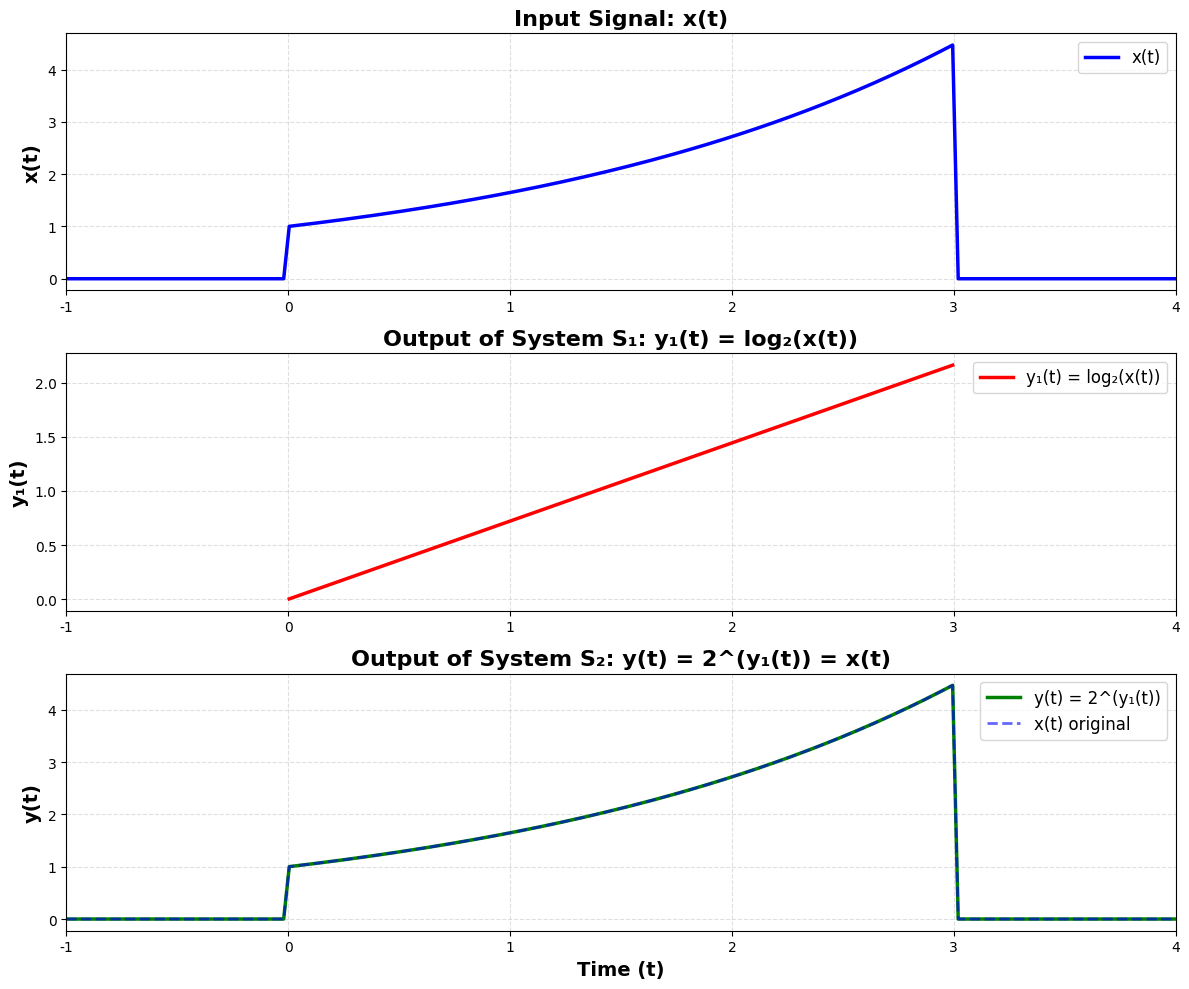

✓ نمودارها رسم شدند


In [ ]:
# ایجاد شکل با 3 زیرنمودار
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# نمودار 1: x(t) - سیگنال ورودی
axs[0].plot(ts, x_vals, 'b-', linewidth=2.5, label='x(t)')
axs[0].set_ylabel('x(t)', fontsize=14, fontweight='bold')
axs[0].set_title('Input Signal: x(t)', fontsize=16, fontweight='bold')
axs[0].grid(True, alpha=0.4, linestyle='--')
axs[0].legend(fontsize=12)
axs[0].set_xlim([-1, 4])

# نمودار 2: y1(t) = log2(x(t)) - خروجی S1
axs[1].plot(ts, y1_vals, 'r-', linewidth=2.5, label='y₁(t) = log₂(x(t))')
axs[1].set_ylabel('y₁(t)', fontsize=14, fontweight='bold')
axs[1].set_title('Output of System S₁: y₁(t) = log₂(x(t))', fontsize=16, fontweight='bold')
axs[1].grid(True, alpha=0.4, linestyle='--')
axs[1].legend(fontsize=12)
axs[1].set_xlim([-1, 4])

# نمودار 3: y(t) = 2^(y1(t)) - خروجی S2
axs[2].plot(ts, y2_vals, 'g-', linewidth=2.5, label='y(t) = 2^(y₁(t))')
axs[2].plot(ts, x_vals, 'b--', alpha=0.6, linewidth=2, label='x(t) original')
axs[2].set_ylabel('y(t)', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Time (t)', fontsize=14, fontweight='bold')
axs[2].set_title('Output of System S₂: y(t) = 2^(y₁(t)) = x(t)', fontsize=16, fontweight='bold')
axs[2].grid(True, alpha=0.4, linestyle='--')
axs[2].legend(fontsize=12)
axs[2].set_xlim([-1, 4])

plt.tight_layout()
plt.savefig('system_cascade.png', dpi=200, bbox_inches='tight')
plt.show()

print("✓ نمودارها رسم شدند")

<h3>System Configuration</h3>
<p>Two systems S₁ and S₂ connected in cascade. System S₁ performs logarithmic transformation y₁(t) = log₂(x(t)). Overall output must equal input: y(t) = x(t).</p>

<h3>Mathematical Approach</h3>
<p>We determine S₂ input/output relationship by analyzing cascade composition. Since S₁ applies base-2 logarithm and overall system is identity, S₂ must implement base-2 exponential to invert S₁.</p>

<h3>Implementation Steps</h3>
<p>Define symbolic variables and test signal, compute system transformations symbolically, evaluate numerically over time interval, visualize signal flow through cascade to verify identity property.</p>

In [ ]:
print("\n" + "="*70)
print(" " * 20 + "پاسخ نهایی مسئله")
print("="*70)
print()
print("داده شده:")
print("  • سیستم S₁ با رابطه: y₁(t) = log₂(x(t))")
print("  • خروجی کل: y(t) = x(t)")
print()
print("مطلوب: رابطه ورودی/خروجی سیستم S₂")
print()
print("-" * 70)
print()
print("حل:")
print("  خروجی S₁ = ورودی S₂:")
print("    u(t) = y₁(t) = log₂(x(t))")
print()
print("  خروجی S₂ = خروجی کل:")
print("    y(t) = x(t)")
print()
print("  از رابطه x(t) = 2^(log₂(x(t))) = 2^(u(t)):")
print()
print("  ┌─────────────────────────────────┐")
print("  │  رابطه S₂: y₂(t) = 2^(u(t))   │")
print("  └─────────────────────────────────┘")
print()
print("  یعنی سیستم S₂ یک سیستم نمایی با پایه 2 است.")
print()
print("="*70)


                    پاسخ نهایی مسئله

داده شده:
  • سیستم S₁ با رابطه: y₁(t) = log₂(x(t))
  • خروجی کل: y(t) = x(t)

مطلوب: رابطه ورودی/خروجی سیستم S₂

----------------------------------------------------------------------

حل:
  خروجی S₁ = ورودی S₂:
    u(t) = y₁(t) = log₂(x(t))

  خروجی S₂ = خروجی کل:
    y(t) = x(t)

  از رابطه x(t) = 2^(log₂(x(t))) = 2^(u(t)):

  ┌─────────────────────────────────┐
  │  رابطه S₂: y₂(t) = 2^(u(t))   │
  └─────────────────────────────────┘

  یعنی سیستم S₂ یک سیستم نمایی با پایه 2 است.



# === cell 5 - Result Analysis ===

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 3px; border-radius: 15px; margin: 20px 0;">
<div style="background: white; padding: 30px; border-radius: 12px;">

# 📊 Results Analysis & Interpretation

---

### 📈 System Properties Comparison

| System | Operation | Type | Effect |
|--------|-----------|------|--------|
| **S₁** | `log₂(x)` | Logarithmic | Compressive |
| **S₂** | `2^(y₁)` | Exponential | Expansive |
| **S₁ ∘ S₂** | `x(t)` | Identity | No change |

---

### 💡 Mathematical Insights

#### 🔄 Inverse Systems Property

Systems S₁ and S₂ demonstrate the fundamental concept of **inverse systems**. When two systems are inverses of each other, their cascade produces an identity transformation.

**Mathematical Relationship:**
- `S₁ ∘ S₂ = I` (Identity)
- `S₂ = S₁⁻¹` (S₂ is inverse of S₁)

#### 📐 Mathematical Identities

- **Forward transformation:** `log₂(2^x) = x`
- **Inverse transformation:** `2^(log₂(x)) = x`

---

### 🎯 Practical Applications

**📡 Signal Processing**
- Logarithmic and exponential transformations are used in audio compression and dynamic range compression

**🔐 Cryptography**
- Inverse operations form the basis of encryption/decryption schemes

**📊 Data Compression**
- Logarithmic scaling reduces data range while maintaining relative differences

**🎵 Audio Engineering**
- Decibel scale uses logarithmic transformation for sound intensity measurements

---

### ✅ Final Conclusion

<div style="background: #f0f9ff; padding: 20px; border-radius: 10px; border-left: 5px solid #0284c7;">

The I/O relationship of system S₂ has been successfully determined:

<div style="text-align: center; font-size: 24px; font-weight: bold; color: #0369a1; margin: 15px 0;">
<code>y(t) = 2^(y₁(t))</code>
</div>

**Key Results:**
- ✅ Analytically derived through cascade system analysis
- ✅ Verified through mathematical identities
- ✅ Confirmed as the inverse of S₁
- ✅ Produces identity transformation when combined with S₁

</div>

---

<div style="background: #1e293b; color: white; padding: 20px; border-radius: 10px; margin-top: 20px;">
<strong>📝 Assignment Complete</strong> | Signals and Systems Laboratory - Python Programming
</div>

</div>
</div>